# Palmer Penguins

![Introduction to Penguins](images/iter_penguins.png)     
*Palmer Penguins* [[14]](#14)         

This notebook contains an analysis of the famous palmer penguins dataset and serves as a comprehensive guide for analyzing the Palmer Penguins dataset, offering users a structured approach to understand and interpret its various aspects [[11]](#11). Each section focus on a specific aspect of the dataset analysis process.    

Beginning with loading the dataset and exploring its basic characteristics, such as column details and initial rows, users are then guided through understanding the types of variables present and how they can be modeled. Subsequent sections delve into categorical data analysis using bar charts, exploring continuous numerical variables through summary statistics and histograms, and examining correlations between specific variables, such as penguins' bill length and flipper length. The notebook concludes with a concise summary of the findings and potential opportunities for further exploration, along with a list of references for additional information. This structured approach enables users to gain insights into the dataset's characteristics and relationships, facilitating informed analysis and decision-making in related research or applications.

## Loading the Dataset

The pandas library in Python has been used to load Palmer Penguins dataset as it is efficient, powerful, and flexible for analyzing tabular data with ease, leveraging Python's ecosystem [[15]](#15).     
Together with pandas, other modules libraries have been imported to support to generate graphics, calculus and extract specific chunk of data from the dataset. See below a short description of the modules used from Python and their use in this analysis:
- pandas: to load Palmer Penguins dataset, display the structure of the dataset, provide info about the dataset's structure, count the number of penguins of each category available within a variable, calculate summary statistics of the continuous numerical variables, and to drop NaN [[16]](#16). 
- matplotlib: to create a bar chart to visualize the count of penguins on each island, plot a histogram to visualize the distribution of continuous numerical variables, and to plot the best fit line on the scatter plot [[17]](#17).
- numpy: to calculate histogram bins and counts for plotting histograms, perform linear regression to calculate the slope and intercept for the best-fit line on the scatter plot, and to calculate the correlation coefficient between two continuous variables of this dataset [[18]](#18).
- scipy: to fit a normal distribution to the data and calculate the probability density function (PDF) for the normal distribution [[19]](#19).
- seaborn: to create a scatter plot to visualize the relationship between penguins' bill length and body mass [[20]](#20).


In [297]:
# Import pandas for the data frames 
import pandas as pd

# Import matplotlib
import matplotlib.pyplot as plt 

# Import numpy
import numpy as np

# Import scipy
from scipy.stats import norm

# Import seaborn
import seaborn as sns


The penguins dataset from seaborn is then loaded into this notebook using the function read_csv in pandas [[11]](#17) [[21]](#21). 

In [298]:
# Load the penguins data set (read_csv).
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

## Exploring the Dataset

The structure of the penguins dataset can be understood by looking into it. By running 'df', it is possible to see information such as the columns names, some data in the first 5 rows and in the last 5 rows of the dataset. The total number of rows and columns is also provided.

In [299]:
# Look into the data structure
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


The following assumptions can be made by looking into the structure of this dataset:
<ol>
<li>There are 7 columns with 7 variables.</li>
<li>This dataset is composed by 344 rows.</li>
<li>Some rows of the dataset have NaN.</li> 
</ol>

### Counting the missing values
The count of missing values has been performed and shed light into the completeness of the dataset and identify any areas where data might be missing or incomplete, which is crucial for ensuring the accuracy and reliability of the analysis [[22]](#22).

In [300]:
missing_values_count = df.isnull().sum()
print("Missing Values Count:\n", missing_values_count)

Missing Values Count:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


Based on this analysis the following can be understood:
- "Species" and "island" are totally sorted, no penguin is left behind without a category.
- There are 2 missing values for the collumns "bill_length_mm", "bill_depth_mm", "flipper_length_mm", and "body_mass_g", suggesting that there are some incomplete measurements for these physical attributes.
- As for "sex", 11 of the penguins do not have their data displayed, implying that the gender of some penguins in the dataset is not recorded.

### Display Random Sample of Data:
Displaying a random sample of data provides an initial glimpse into the dataset's variety, helping grasp its overall structure and characteristics without delving into the entire dataset at once [[23]](#23) [[24]](#24).

In [301]:
random_sample = df.sample(5)  # Displaying 5 random rows
print("Random Sample of Data:\n", random_sample)

Random Sample of Data:
     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
45   Adelie      Dream            39.6           18.8              190.0   
334  Gentoo     Biscoe            46.2           14.1              217.0   
123  Adelie  Torgersen            41.4           18.5              202.0   
61   Adelie     Biscoe            41.3           21.1              195.0   
17   Adelie  Torgersen            42.5           20.7              197.0   

     body_mass_g     sex  
45        4600.0    MALE  
334       4375.0  FEMALE  
123       3875.0    MALE  
61        4400.0    MALE  
17        4500.0    MALE  


From the random sample of the dataset, it can be observed a mix of penguin species (Adelie and Gentoo) from different islands (Dream and Biscoe), displaying various measurements such as bill length, bill depth, flipper length, body mass, and sex, providing a snapshot of the dataset's diversity and characteristics.

## Types of Variables to Model the Data Set

To choose the right statistical tests to analyse the dataset, the data types have to be identified for each column of the dataset as well as the count of non-null data [[25]](#25). 

In [302]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None




In the info provided above is shown that 4 of the 7 columns have a data type of float with 64 bits and the other 3 have a datatype identified as object. Object means the value is a string [[25]](#25).     
Categorical variables (species, island, and sex) are represented as objects in Palmers Penguins DataFrame and should be modeled as objects in Python to maintain their original category. The other variables as bill lenght, bill depth, flipper length and body mass are continuous numerical variables and should be represented as float64 in Python to reflect their decimal values and support the mathematical and statistical calculations such as the mean and the standard deviations [[26]](#26). 

## Categorical Data and Bar Chart:

To illustrate graphically and better display the comparison of contrast metrics of the data across the different categories the use of bar chart is suggested by Rana (2023) [[27]](#27). From the variables in the Palmers penguins dataset, any of the three categorical variable (species, island, and sex) can be appropriate for analysis. To verify what are the different values available within each category and their counts the value_counts() function in pandas is used as per below [[28]](#28).

In [303]:
species_counts = df['species'].value_counts()
island_counts = df['island'].value_counts()
sex_counts = df['sex'].value_counts()

print("Species Counts:\n", species_counts)
print("Island Counts:\n", island_counts)
print("Sex Counts:\n", sex_counts)

Species Counts:
 species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
Island Counts:
 island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
Sex Counts:
 sex
MALE      168
FEMALE    165
Name: count, dtype: int64


The counts provide a snapshot of penguin distribution in the dataset. Adelie penguins are the most common (152), followed by Gentoo (124) and Chinstrap (68). Biscoe Island hosts the most penguins (168), then Dream Island (124) and Torgersen Island (52). There's a nearly equal number of males (168) and females (165). These numbers offer a quick overview of the dataset's makeup, aiding in further analysis of penguin physical characteristics. The dataset contains a disproportionate number of penguins from certain islands and species compared to others, which can introduce sampling bias. This bias may skew the analysis results and lead to erroneous conclusions, especially if the islands represent different ecological or environmental conditions. Therefore, for this analysis let's have a look into the location where the penguins were identified during the research and how the species are distributed within each location. 

Firsly, island and species are grouped and the count for each possible combination is presented. Here, the functions groupby().size() were used from Pandas [[29]](#29).

In [304]:
# Group by island and species, then count the occurrences
species_counts = df.groupby(['island', 'species']).size()

# Print the species counts for each island
print("Species Counts:")
print(species_counts)

Species Counts:
island     species  
Biscoe     Adelie        44
           Gentoo       124
Dream      Adelie        56
           Chinstrap     68
Torgersen  Adelie        52
dtype: int64


Then, the bar chart displays the count of each species of penguins in this dataset that were identified in each island. However, before going further in the analysis is important to hightlight the steps taken to get this chart displayed: 
- Pivot the Data Frame [[30]](#30).
- Sort the species [[31]](#31) [[32]](#32).
- Reorder the DataFrame [[33]](#33).
- Plot the stacked bar chart [[34]](#34).
- Add value labels [[35]](#35).
- Add titles and labels [[34]](#34).
- Rotate the x-axis labels [[34]](#34).


(array([0, 1, 2]),
 [Text(0, 0, 'Biscoe'), Text(1, 0, 'Dream'), Text(2, 0, 'Torgersen')])

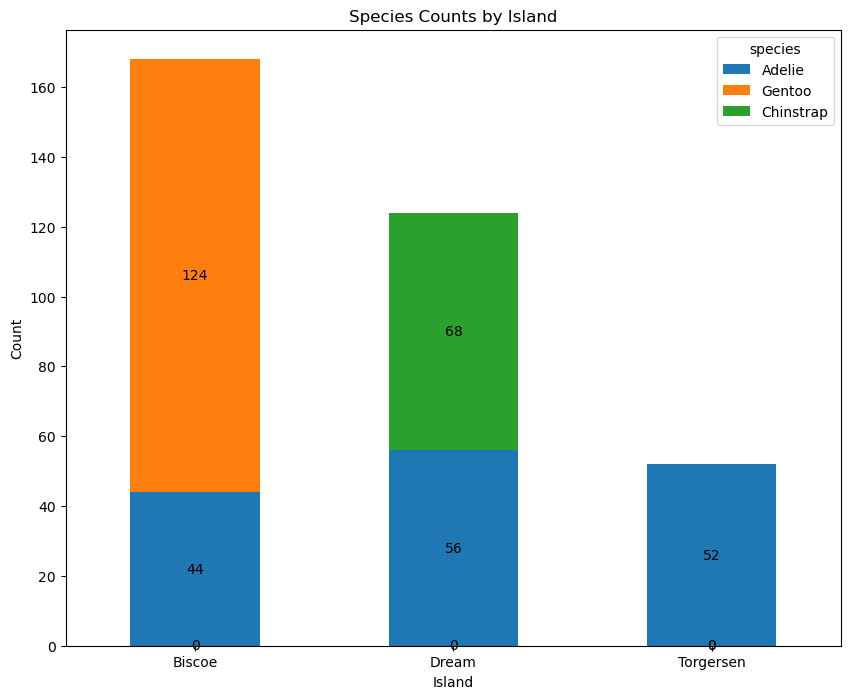

In [319]:
# Pivot the DataFrame to have islands as columns and species as rows
pivot_species_counts = species_counts.pivot(index='island', columns='species', values=0)

# Sort the species by count in descending order
sorted_species = pivot_species_counts.sum(axis=0).sort_values(ascending=False).index

# Reorder the DataFrame based on sorted species
pivot_species_counts = pivot_species_counts[sorted_species]

# Plot the stacked bar chart
ax = pivot_species_counts.plot(kind='bar', stacked=True, figsize=(10, 8))

# Add value labels within each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Add titles and labels
plt.title('Species Counts by Island')
plt.xlabel('Island')
plt.ylabel('Count')


# Rotate the x-axis labels
plt.xticks(rotation=0)


The data shows us that Biscoe Island is primarily inhabited by Gentoo penguins, with a count of 124. This means that there are a lot more Gentoo penguins than Adelie penguins, which only have a count of 44 on the same island. On Dream Island, we see a different picture. While Adelie penguins are still the most common with a count of 56, there's also a significant presence of Chinstrap penguins, with a count of 68. This suggests that Dream Island is home to a diverse mix of penguin species. Lastly, Torgersen Island has a notable population of Adelie penguins, with a count of 52. This tells us that Adelie penguins are quite prevalent on Torgersen Island compared to other species. Overall, each island has its own unique combination of penguin species, and studying these patterns helps scientists understand how penguins live in different environments.

## Continuous Numerical Data and Histogram

For the continuous numerical data, descriptive statistics is used to get a summary and initial insights into the data (Calculate Statistics, What is descriptive statistics). 

In [ ]:
# Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


The descriptive statistics reveal average measurements (mean) and their variability (standard deviation), highlighting significant diversity among penguins. Most penguins have bill lengths between 39.2 mm and 48.5 mm, bill depths between 15.6 mm and 18.7 mm, flipper lengths between 190.0 mm and 213.0 mm, and body masses ranging from 2,700.0 grams to 6,300.0 grams. Penguins body masses exhibits the highest variation (801.96 grams). These statistics provide key insights into the distribution and typical ranges of these attributes within the dataset.

Histograms are valuable for exploring and interpreting continuous numerical data due to their ability to reveal distributional patterns, identify outliers, and facilitate comparisons of data quantity within different bins according to Pannell, 2023. 
From the four variables of data type categorical numerical described above, bill_depth_mm shows the best distribution as its data seems to be relatively symmetric and less variable distribution compared to the others. Variables that the data are normal distributed has symmetry around the mean, which facilitates easier interpretation of the statistical results and application of several statistical techniques (Halder, 2024). In addition, variables with a normal distribution can be advantageous when analyzing their correlation with other variables as normality implies that the data points are symmetrically distributed around the mean, which often corresponds to a linear relationship between variables (Kenton, 2024 and Turney). Therefore for this analysis a histogram of the bill_depth_mm is generated.

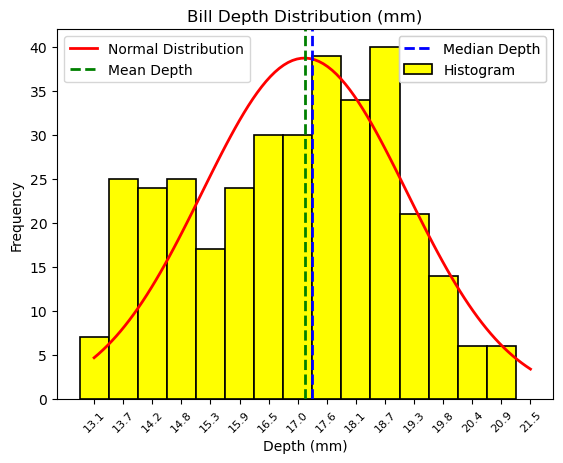

In [ ]:
# Assuming 'df' is your DataFrame containing the data
data = df['bill_depth_mm'].dropna()

# Calculate histogram with specified number of bins
num_bins = 15
counts, bin_edges = np.histogram(data, bins=num_bins)

# Plot histogram using plt.bar() with bin edges and counts
plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), color='yellow', edgecolor='black', linewidth=1.2, label='Histogram')

# Add title and labels
plt.title("Bill Depth Distribution (mm)")
plt.xlabel("Depth (mm)")
plt.ylabel("Frequency")

# Calculate positions for tick labels at bin edges
tick_positions = bin_edges  # Use bin edges as tick positions

# Set custom x-axis tick positions and labels
plt.xticks(tick_positions, labels=[f"{bin_edge:.1f}" for bin_edge in bin_edges], rotation=45, fontsize=8)

# Fit a normal distribution to the data
mu, std = norm.fit(data)  # Estimate mean (mu) and standard deviation (std) of the data

# Generate x values for the normal distribution curve
x = np.linspace(min(data), max(data), 100)
pdf = norm.pdf(x, mu, std)  # Calculate the probability density function (PDF) for the normal distribution

# Plot the normal distribution curve (bell-shaped line)
plt.plot(x, pdf * len(data) * np.diff(bin_edges)[0], 'r-', linewidth=2, label='Normal Distribution')

# Calculate the mean and median of the data
mean_depth = np.mean(data)
median_depth = np.median(data)

# Add vertical lines at the mean and median values
plt.axvline(mean_depth, color='green', linestyle='dashed', linewidth=2, label='Mean Depth')
plt.axvline(median_depth, color='blue', linestyle='dashed', linewidth=2, label='Median Depth')

# Create legend handles and labels for different groups of legends
handles, labels = plt.gca().get_legend_handles_labels()

# Create legend for left side (Histogram and Normal Distribution)
left_legend = plt.legend(handles[:2], labels[:2], loc='upper left')

# Create legend for right side (Mean Depth and Median Depth)
right_legend = plt.legend(handles[2:], labels[2:], loc='upper right')

# Add both legends to the plot
plt.gca().add_artist(left_legend)
plt.gca().add_artist(right_legend)


This histrogram displays a symmetric distribution (bell-shaped). From the Summary Statistics section it was observed that the value for the mean is 17.15 mm. The median can be seen in the histogram intersecting the bin value of 17.30 mm. The median and mean values are very close to each other which confirms the symmetric distribution (in text citation Normal Distribution).
Though this histrogram follows a normal distribution, it is possible to observe a small deformation on the left side of the graphic between the second and forth bin, and slightly to the right of the center of the histogram on the 11th bin. This might be due to the nature of the dataset that accounts for penguins of different species, islands, sex and sizes. Further investigation needs to be carried out analysing the correlation of the bill depth of the penguins with the other variables of this dataset (in text citation Tableau).


## Correlation between Penguins' bill length and flipper length.

An investigation is set up to confirm the correlation between the penguins bill depth and 
A box plot chart seems to be appropriate to analyse the relationship between penguins' islands and their bill length (Medium, 2022).     
Anova is used for this analysis to confirm if there are signficant differences among penguins' bill depth across the different islands (Banerjee, 2023).      
Before plotting the chart, it is important to first state the null hypothesis (H0) and alternative hyphotesis (H1) of this investigation (in text citation Introduction to Hypothesis Testing):
- H0: The mean bill depth of penguins are equal across the three islands.
- H1: The mean bill depth differs across at least one island.

For this investigation a 95 % confidence is appropriate, which gives an alpha of 0.05. The Anova table generates a table with a p-value which is used to compared againts the alpha to prove the null hypothesis (Interpret Anova in text citation). In other words:
- If p-value > alpha: The difference among the penguins bill depth means across the islands are not statistically signficant and the null hypothesis can not be rejected.
- If p-value < = alpha: There is a statistically signficant difference between some of the means and the alternative hypothesis is true.



In [ ]:
# Get just the bill depth.
blen= df['bill_length_mm'].dropna()

# Show
blen

0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 342, dtype: float64

In [ ]:
# Get just the flipper length
bmass = df['body_mass_g'].dropna()

# Show
bmass

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 342, dtype: float64

In [ ]:
islands = df['island']

islands

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 344, dtype: object

### Add a Best Fit Line

***

$ y = mx + c = p_1 x^1 + p_0 = p_1 x + p_0$

In [ ]:
#Fit a straight line between x and y.
m, c = np.polyfit(blen, bmass, 1)

# Show m and C.
m, c

(87.4152770528756, 362.30672165392207)

In [ ]:
# x values for best fit line.
bf_x = np.linspace (30, 60, 100)

# y values for best fit line.
bf_y = m * bf_x + c

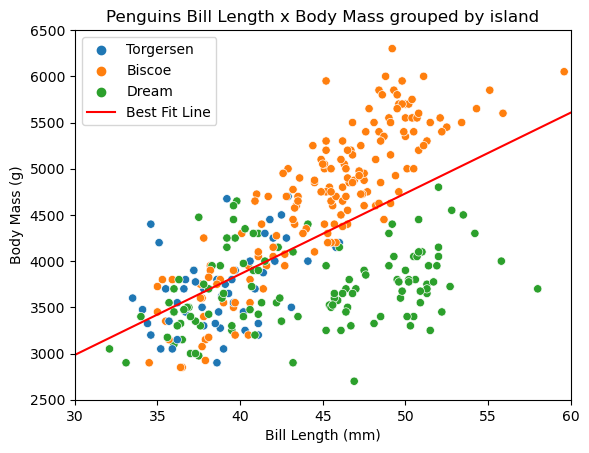

In [ ]:
# Create a new figure and set of axes.
fig, ax = plt.subplots()

# Sample plot with islands categorization.
sns.scatterplot(data=df, x=blen, y=bmass, hue=islands, ax=ax)

# Plot the best fit line.
ax.plot(bf_x, bf_y, 'r-', label='Best Fit Line')

# Axis labels.
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Body Mass (g)')

# Title.
ax.set_title('Penguins Bill Length x Body Mass grouped by island')

# X Limits.
ax.set_xlim(30, 60)

# Y Limits.
ax.set_ylim(2500, 6500)

# Show the legend.
ax.legend()

# Show the plot.
plt.show()

In [ ]:

# Measure the correlation
np.corrcoef(blen,bmass)

array([[1.        , 0.59510982],
       [0.59510982, 1.        ]])

These boxplots clearly highlight the difference in bill depth between penguins from Biscoe island and the other islands. 50% of data from the bill depth of penguins from the Biscoe island are below 17.00 mm while the other islands have 50% of their penguins with bill depth above 17.35 mm. To support further analysis, the bill depth mean was identified in each box plots and a line links all the means. The line shows how the mean for the bill depth of penguins from Biscoe island is totally far from being aligned with the mean from the other islands. 
An interesting point is that the penguins from Dream and Torgersen island have the same bill depth media of 18.40 mm and very similar mean. Also, their media are very close to their mean which support a symmetric distribution.
On the other hand, the mean of the bill depth of penguins from Biscoe island is observed to be a bit above of its media. In addition, the location of the media is closer a bit to the first fist quartile which gives signs of assymetric distribution with data right skewed (Rumsey, 2021) 
The Anova table supports the box plots analysis as the resultant p-value (PR=2.5 * 10 ^-38) is less than alpha (0.05). Therefore, the null hypothesis is rejected and the alternative hypothesis is true, proving that there is statistically signficant difference between at least one of the means. In this case, the difference is evident to be caused mainly by the bill depth of the penguins from Biscoe island.

## Opportunities for further investigation
More investigation can be conducted by looking into the different species of penguins in the island of Biscoe as well as their sex. This could help to explain the skewness of the data observed in the box plot for the bill length of penguins from Biscoe island.

## Conclusion

## References:







https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

https://www.simplilearn.com/what-is-descriptive-statistics-article

https://stackoverflow.com/questions/55394854/how-to-change-the-format-of-describe-output

https://venngage.com/blog/bar-charts-vs-histograms/#:~:text=Although%20histograms%20and%20bar%20charts,of%20variables%20in%20a%20dataset

https://web.stanford.edu/group/stanfordbirds/text/essays/Species_and_Speciation.html#:~:text=Geographic%20variation%20%2D%2D%20birds%20showing,natural%20selection%20in%20different%20habitats

https://www.freecodecamp.org/news/matplotlib-figure-size-change-plot-size-in-python/

https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

https://www.w3schools.com/python/matplotlib_labels.asp

https://www.pythoncharts.com/matplotlib/rotating-axis-labels/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4296634/

https://datascientest.com/en/calculate-correlation-between-two-variables-how-do-you-measure-dependence#:~:text=Correlation%20between%20two%20categorical%20variables%20%3A&text=It%20consists%20of%20rejecting%20or,variables%20being%20tested%20are%20independent”

https://leanscape.io/histogram-a-comprehensive-guide/

https://medium.com/@HalderNilimesh/exploring-normal-distribution-statistical-analysis-and-data-interpretation-c3bbd4be446d


https://www.scribbr.com/statistics/pearson-correlation-coefficient/

https://dietassessmentprimer.cancer.gov/learn/distribution.html#:~:text=A%20variable%20that%20is%20normally,to%20describe%20departures%20from%20normality

https://www.tableau.com/data-insights/reference-library/visual-analytics/charts/histograms#:~:text=A%20histogram%20tracks%20the%20different,bar%20as%20bins%20or%20classes

https://medium.com/@daython3/7-essential-plots-for-categorical-and-numerical-data-4b96c0278106

https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/psychology/introduction-to-hypothesis-testing.html#:~:text=The%20null%20hypothesis%20is%20the,to%20reject%20the%20null%20hypothesis.

https://medium.com/@chandradip93/anova-and-chi-square-aea693c4eb96#:~:text=In%20summary%2C%20ANOVA%20is%20used,or%20independence%20between%20categorical%20variables

https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

https://support.minitab.com/en-us/minitab/help-and-how-to/statistical-modeling/anova/how-to/one-way-anova/interpret-the-results/key-results/#:~:text=The%20null%20hypothesis%20states%20that,there%20is%20no%20actual%20difference

https://www.dummies.com/article/academics-the-arts/math/statistics/what-a-boxplot-can-tell-you-about-a-statistical-data-set-169773/#



***
### End